#### https://docs.ultralytics.com/usage/python/

#### Train Settings
#### https://docs.ultralytics.com/modes/train/

#### Prediction Settings
#### https://docs.ultralytics.com/modes/predict/


In [ ]:
# 1. Import libraries
from ultralytics import YOLO
import torch
import cv2
import time
from PIL import Image
import yaml
from utils import split_dataset
import os
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device:',device)

In [ ]:
# create yaml file
yaml_filename = 'odometer_dataset.yaml'   

# 1. Dataset preparation


### 1.1 Splitting into train and val

In [ ]:
# splitting = split_dataset.train_and_val_split(im_dir = 'car_images/', train_percent= 80)          # uncomment to use

### 1.3 Create yaml file [Check for filewriting/formatting errors after running]

In [ ]:
data = {'train': 'C:/Users/car_dataset/images/train', 
'val': 'C:/Users/car_dataset/images/val',
'nc': 1
'names': '''['odometer']'''
}

# Write odometer_dataset.yaml file 
with open('odometer_dataset.yaml', 'w') as file:
    yaml.dump(data, file)

# 2. Yolo model

### 2.1 Initiate a model with pre-trained weights

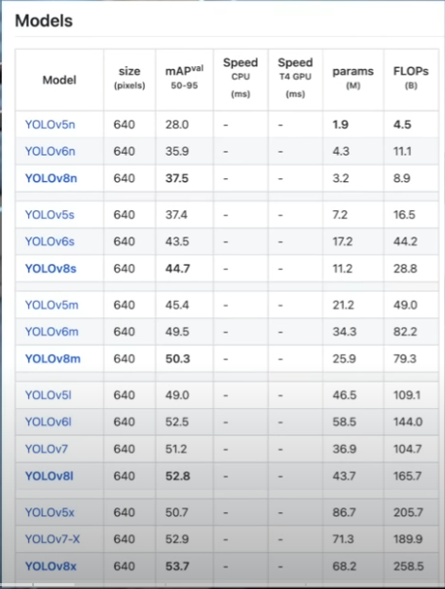

### 2.1.1 Train the model

1. Load and build from a yaml like yolov8n.yaml or if you want to change, change the default.yaml and then build from it
2. While training, provide your custom {}.yaml with train, val imagepaths and labels info.
3. device = 'cpu' in model.train() line if CUDA error persists.

In [ ]:
# 3. Create yolo model
model = YOLO('yolov8n.yaml')
model = YOLO('yolov8n.pt')                       # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# 4. Train the model
model.train(data='{}'.format(yaml_filename), epochs=100 ,patience=15, batch=2,  imgsz=640) 

### 2.2 Load the best trained weights and get/save predictions

In [ ]:
# Load the pretrained weights
model = YOLO('runs/train/weights/best.pt')
# 5. to run prediction on 1 image at a time
im = Image.open('new_car_images/car99.jpg')
results = model.predict(source=im, save=True)

# 6. to run prediction on all images in a folder
im_dir = 'new_car_images/'
results = model.predict(source=im_dir, save=True)